## **Latar Belakang Masalah**

Seorang Data Analyst sedang mendapatkan sebuah pekerjaan di Transjakarta. Pimpinan perusahaan ingin mengevaluasi kinerja dari seluruh elemen Transjakarta selama bulan April 2023. Pengevaluasian tersebut bertujuan untuk memberikan saran beserta masukan terhadap kinerja Transjakarta jika terdapat kinerja yang belum memenuhi harapan beserta mencanangkan program / keputusan baru agar kinerja Transjakarta dapat lebih baik untuk waktu mendatang. 

Pimpinan perusahaan tersebut membutuhkan serta menugaskan Data Analyst untuk menganalisis data informasi Transjakarta selama bulan April 2023 dengan tujuan agar hasil analisa tersebut dapat dijadikan bahan untuk mengevaluasi kinerja dari seluruh elemen Transjakarta selama bulan April 2023. Data tersebut berisikan sejumlah informasi seperti data setiap pengguna Transjakarta yang meliputi rute yang digunakan, tanggal pengguna tersebut menggunakan Transjakarta, biaya yang ditanggung oleh pengguna di setiap rute, dan lainnya.

Data Analyst tersebut dalam proses untuk melakukan analisa terhadap data Transjakarta tersebut secara prosedur tentunya dimulai dari melakukan cleaning terhadap data terlebih dahulu, kemudian dilanjutkan dengan melakukan eksplorasi terhadap data dengan tujuan untuk mengetahui profil dari data tersebut lalu melakukan analisa yang dapat dilakukan dengan bantuan visualisasi dari setiap data yang ingin dianalisa.



## **Rumusan Masalah**

**1. Mengetahui rute Transjakarta yang paling ramai dilalui oleh pengguna**

- Mengetahui rute yang paling ramai digunakan oleh pengguna berdasarkan corridorName dan corridorID
- Mengetahui lokasi maps rute yang paling ramai dengan menggunakan data longitude dan latitude
- Membuat insight 

**2. Mengetahui jumlah pengguna Transjakarta berdasarkan waktunya**

- Mengetahui trend line dari jumlah pengguna harian Transjakarta dalam bulan April 2023
- Mengetahui trend line dari jumlah pengguna Transjakarta berdasarkan rata-rata dari jam selama bulan April 2023
- Mengetahui dan mengambil insight dari tanggal beserta hari dengan jumlah pengguna Transjakarta terbanyak selama bulan April 2023
- Mengetahui dan mengambil insight dari rata-rata jam dengan jumlah pengguna Transjakarta terbanyak selama bulan April 2023
    
**3. Mengetahui informasi Transjakarta berdasarkan data dari setiap pengguna**

- Mengetahui jumlah pengguna Transjakarta berdasarkan gender
- Mengetahui jumlah pengguna Transjakarta berdasarkan jenis transaksi yang digunakan
- Mengetahui jumlah pengguna Transjakarta berdasarkan tahun kelahiran dan nama pengguna
- Mengetahui rata-rata pengeluaran biaya Transjakarta pengguna berdasarkan gender
- Mengambil insight dari informasi tersebut

## **Deskripsi Data**

| **Nama Kolom** | **Penjelasan**                                |
| ---------------- | -------------------------------------------------------- |
| TransID       | Kode unik setiap transaksi                 |
| payCardID     | Kode unik setiap kartu pembayaran pengguna                     |
| payCardBank   | Jenis transaksi pengguna                      |
| payCardName     | Nama pengguna dari setiap kartu pembayaran |
| payCardSex | Gender pengguna dari setiap kartu pembayaran             |
| direction      | Arah rute setiap pengguna ( 0 = pergi ; 1 = kembali)                  |
| tapInStops         | kode unik terminal tempat pengguna mulai berangkat                     |
| tapInStopsName       | Nama terminal tempat pengguna mulai berangkat                   |
| tapInStopsLat    | Koordinat latitude terminal tempat pengguna berangkat                |
| tapInStopsLon     | Koordinat longitude terminal tempat pengguna berangkat           |
| stopStartSeq  | urutan terminal tempat pengguna mulai berangkat dalam sebuah rute                 |
| tapInTime     | Waktu dalam bentuk tanggal beserta jam pengguna mulai berangkat                     |
| tapOutStops      | kode unik terminal tempat pengguna turun |
| tapOutStopsName      | Nama terminal tempat pengguna turun                               |
| tapOutStopsLat      | Koordinat latitude terminal tempat pengguna turun                        |
| tapOutStopsLon        | Koordinat longitude terminal tempat pengguna turun              |
| stopEndSeq     | urutan terminal tempat pengguna turun dalam sebuah rute             |
| tapOutTime     | Waktu dalam bentuk tanggal beserta jam pengguna turun               |
| payAmount       | Biaya yang harus dikeluarkan pengguna                         |

## **Load Dataset**

In [154]:
# Library untuk numpy dan dataframe
import numpy as np
import pandas as pd

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Uji statistik normalitas
from statsmodels.stats.diagnostic import lilliefors

# Uji statistik analisis
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest

# Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [155]:
df = pd.read_csv('Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [156]:
# Mengetahui tipe / format dari setiap data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## **Data Cleaning**

## **1. Menghapus whitespace dari data kategorik**

- Data kategorik terdiri dari:
    - payCardBank
    - payCardName
    - payCardSex
    - corridorID
    - corridorName
    - tapInStops
    - tapInStopsName
    - tapInTime
    - tapOutStops
    - tapOutStopsName
    - tapOutTime
    

In [157]:
df['payCardBank'] = df['payCardBank'].str.strip()

In [158]:
df['payCardName'] = df['payCardName'].str.strip()

In [159]:
df['payCardSex'] = df['payCardSex'].str.strip()

In [160]:
df['corridorID'] = df['corridorID'].str.strip()

In [161]:
df['corridorName'] = df['corridorName'].str.strip()

In [162]:
df['tapInStops'] = df['tapInStops'].str.strip()

In [163]:
df['tapInStopsName'] = df['tapInStopsName'].str.strip()

In [164]:
df['tapInTime'] = df['tapInTime'].str.strip()

In [165]:
df['tapOutStops'] = df['tapOutStops'].str.strip()

In [166]:
df['tapOutStopsName'] = df['tapOutStopsName'].str.strip()

In [167]:
df['tapOutTime'] = df['tapOutTime'].str.strip()

## **2. Handling missing value**

In [168]:
# Mengetahui data manakah beserta jumlah missing value
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

***A. Handling missing value pada data numerik***

Data numerik yang memiliki missing values terdiri dari:
- tapOutStopsLat
- tapOutStopsLon
- stopEndSeq
- payAmount
- tapOutTime

**A.1 Handling missing value pada tapOutStopsLat**

<Axes: xlabel='tapOutStopsLat', ylabel='Count'>

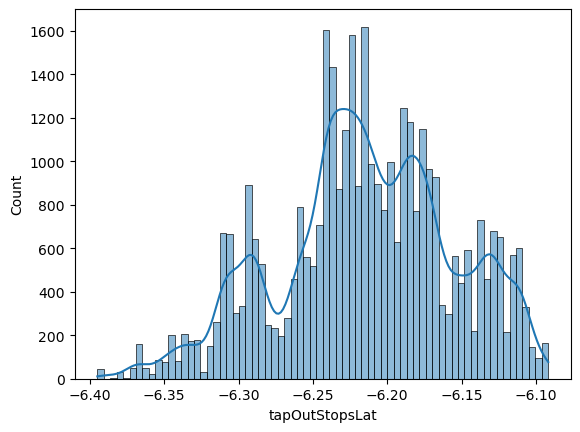

In [170]:
# Menghandle missing value pada data tapOutStopsLat
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='tapOutStopsLat', kde=True)

In [171]:
# Mengetahui distribusi data dengan nilai kurtosis
# Nilai kurtosis pada output menunjukkan distribusi data tidak normal dan platy kurtosis (kurtosis < 3)
df['tapOutStopsLat'].kurtosis()

-0.3431328068797055

In [172]:
# Mengetahui distribusi data dengan nilai skew
# Nilai skew pada output menunjukkan distribusi data tidak normal dan left skewed (skew < 0)
df['tapOutStopsLat'].skew()

-0.22590932385496618

In [173]:
# Mengetahui normalitas dengan uji statistik liliefors
# Menggunakan uji statistik liliefors karena cocok untuk jumlah data yang besar
stats, pvalue = lilliefors(df['tapOutStopsLat'])
stats
pvalue

if pvalue >= 0.05:
    # Ho
    print(f'pvalue={pvalue}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal')
else:
    # Ha
    print(f'pvalue={pvalue}, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal')

pvalue=nan, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal


In [174]:
# Mengisi missing value pada tapOutStopsLat dengan median
# Pengisian missing value dengan median dikarenakan data tidak berdistribusi normal
df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(value=df['tapOutStopsLat'].median())

**A.2 Handling missing value pada tapOutStopsLon**

<Axes: xlabel='tapOutStopsLon', ylabel='Count'>

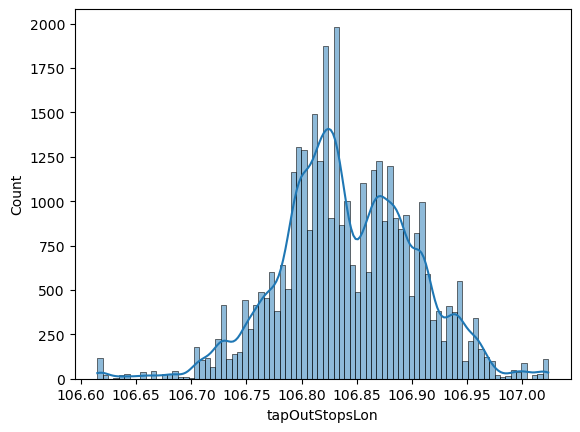

In [175]:
# Menghandle missing value pada data tapOutStopsLon
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='tapOutStopsLon', kde=True)

In [176]:
# Mengetahui distribusi data dengan nilai kurtosis
# Nilai kurtosis pada output menunjukkan distribusi data tidak normal dan platy kurtosis (kurtosis < 3)
df['tapOutStopsLon'].kurtosis()

0.45242034433584255

In [177]:
# Mengetahui distribusi data dengan nilai skew
# Nilai skew pada output menunjukkan distribusi data tidak normal dan left skewed (skew < 0)
df['tapOutStopsLon'].skew()

-0.09632678898778703

In [178]:
# Mengisi missing value pada tapOutStopsLon dengan median
# Pengisian missing value dengan median dikarenakan data tidak berdistribusi normal
df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(value=df['tapOutStopsLon'].median())

In [179]:
# Mengetahui normalitas dengan uji statistik liliefors
# Menggunakan uji statistik liliefors karena cocok untuk jumlah data yang besar
stats, pvalue = lilliefors(df['tapOutStopsLon'])
stats
pvalue

if pvalue >= 0.05:
    # Ho
    print(f'pvalue={pvalue}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal')
else:
    # Ha
    print(f'pvalue={pvalue}, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal')

pvalue=0.0009999999999998899, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal


**A.3 Handling missing value pada stopEndSeq**

<Axes: xlabel='stopEndSeq', ylabel='Count'>

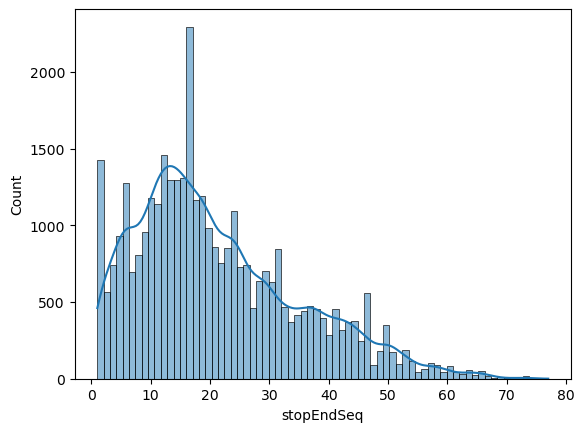

In [180]:
# Menghandle missing value pada data stopEndSeq
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='stopEndSeq', kde=True)

In [181]:
# Mengetahui distribusi data dengan nilai kurtosis
# Nilai kurtosis pada output menunjukkan distribusi data tidak normal dan platy kurtosis (kurtosis < 3)
df['stopEndSeq'].kurtosis()

0.14306451257724184

In [182]:
# Mengetahui distribusi data dengan nilai skew
# Nilai skew pada output menunjukkan distribusi data tidak normal dan right skewed (skew > 0)
df['stopEndSeq'].skew()

0.8153845675869085

In [183]:
# Mengisi missing value pada stopEndSeq dengan median
# Pengisian missing value dengan median dikarenakan data tidak berdistribusi normal
df['stopEndSeq'] = df['stopEndSeq'].fillna(value=df['stopEndSeq'].median())

In [184]:
# Mengetahui normalitas dengan uji statistik liliefors
# Menggunakan uji statistik liliefors karena cocok untuk jumlah data yang besar
stats, pvalue = lilliefors(df['stopEndSeq'])
stats
pvalue

if pvalue >= 0.05:
    # Ho
    print(f'pvalue={pvalue}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal')
else:
    # Ha
    print(f'pvalue={pvalue}, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal')

pvalue=0.0009999999999998899, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal


**A.4 Handling missing value pada payAmount**

<Axes: xlabel='payAmount', ylabel='Count'>

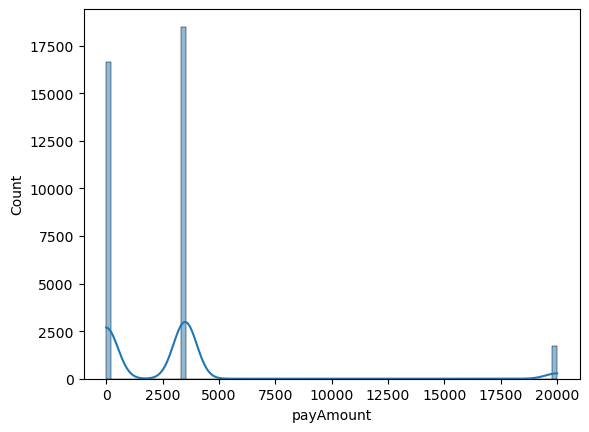

In [185]:
# Menghandle missing value pada data payAmount
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='payAmount', kde=True)

In [186]:
# Mengetahui distribusi data dengan nilai kurtosis
# Nilai kurtosis pada output menunjukkan distribusi data tidak normal dan lapto kurtosis (kurtosis > 3)
df['payAmount'].kurtosis()

10.51514840247649

In [187]:
# Mengetahui distribusi data dengan nilai skew
# Nilai skew pada output menunjukkan distribusi data tidak normal dan right skewed (skew > 0)
df['payAmount'].skew()

3.156257811008617

In [188]:
# Mengisi missing value pada payAmount dengan median
# Pengisian missing value dengan median dikarenakan data tidak berdistribusi normal
df['payAmount'] = df['payAmount'].fillna(value=df['payAmount'].median())

In [189]:
# Mengetahui normalitas dengan uji statistik liliefors
# Menggunakan uji statistik liliefors karena cocok untuk jumlah data yang besar
stats, pvalue = lilliefors(df['payAmount'])
stats
pvalue

if pvalue >= 0.05:
    # Ho
    print(f'pvalue={pvalue}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal')
else:
    # Ha
    print(f'pvalue={pvalue}, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal')

pvalue=0.0009999999999998899, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal


In [190]:
# Memastikan missing value pada semua data numerik telah dihandle
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime          1344
payAmount              0
dtype: int64

In [191]:
stats, pvalue = lilliefors(df['tapInStopsLon'])
stats
pvalue

if pvalue >= 0.05:
    # Ho
    print(f'pvalue={pvalue}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal')
else:
    # Ha
    print(f'pvalue={pvalue}, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal')

pvalue=0.0009999999999998899, pvalue<0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal


***B. Melakukan handling missing value pada kolom kategorik***

Data kategorik yang memiliki missing values terdiri dari:
- corridorID
- corridorName
- tapInStops
- tapOutStops
- tapOutStopsName

In [192]:
# Handling missing value pada corridorID dengan nilai modus
df['corridorID'] = df['corridorID'].fillna(value=df['corridorID'].mode()[0])

In [193]:
# Handling missing value pada corridorName dengan nilai modus
df['corridorName'] = df['corridorName'].fillna(value=df['corridorName'].mode()[0])

In [194]:
# Handling missing value pada tapInStops dengan nilai modus
df['tapInStops'] = df['tapInStops'].fillna(value=df['tapInStops'].mode()[0])

In [195]:
# Handling missing value pada tapOutStops dengan nilai modus
df['tapOutStops'] = df['tapOutStops'].fillna(value=df['tapOutStops'].mode()[0])

In [196]:
# Handling missing value pada tapOutStopsName dengan nilai modus
df['tapOutStopsName'] = df['tapOutStopsName'].fillna(value=df['tapOutStopsName'].mode()[0])

In [197]:
# Memastikan missing value pada semua data numerik telah dihandle
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime          1344
payAmount              0
dtype: int64

## **Data Formatting**

Data yang akan dilakukan perubahan pada format terdiri dari:
- tapOutTime
- tapInTime
- payCardID

In [198]:
# Menghandle missing value pada data tapOutTime
# Mengubah format tapOutTime menjadi date_time
# Pengubahan format tersebut beralasan karena isi data dari tapOutTime berupa bentuk tanggal beserta jam
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [199]:
# Mengisi missing value pada tapOutTime dengan nilai median
# median_value = df['tapOutTime'].median()
# df['tapOutTime'].fillna(median_value, inplace=True)

In [200]:
df.dropna(subset=['tapOutTime'], inplace=True)

In [201]:
# Mengubah format tapInTime menjadi date_time
# Pengubahan format tersebut beralasan karena isi data dari tapInTime berupa bentuk tanggal beserta jam
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In [202]:
# Mengubah format payCardId menjadi dari numerik menjadi kategorik (object)
# Tujuan pengubahan format tersebut karena data payCardID merupakan primary key dan tidak akan dimasukkan ke dalam proses statistik
df['payCardID'] = pd.to_numeric(df['payCardID']).astype(object)

In [203]:
# Mengubah format payCardBirthDate menjadi dari numerik menjadi kategorik (object)
# Tujuan pengubahan format tersebut karena data payCardBirthDate merupakan primary key dan tidak akan dimasukkan ke dalam proses statistik
df['payCardBirthDate'] = pd.to_numeric(df['payCardBirthDate']).astype(object)

## **Outlier**

- Pengecekan terhadap outlier hanya berlaku pada data yang bersifat numerik
- Data yang bersifat numerik terdiri dari:
    - direction
    - tapInStopsLat
    - tapIntStopsLat
    - stopStartSeq
    - tapOutStopsLat
    - tapOutStopsLon
    - stopEndSeq
    - payAmount
- Keputusan untuk melakukan handling atau tidak terhadap outliers bergantung dari jumlah outliers pada masing-masing data numerik terhadap jumlah data keseluruhan pada dataframe

***A. Cek Outliers pada data direction***

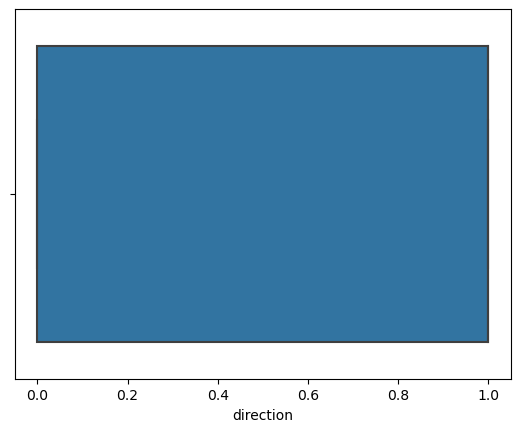

In [204]:
# Mengetahui outliers melalui visualisasi boxplot
# Tidak terdapat outliers pada data direction melalui visualisasi boxplot
sns.boxplot(data=df, x='direction');

***B. Cek Outliers pada tapInStopsLat***

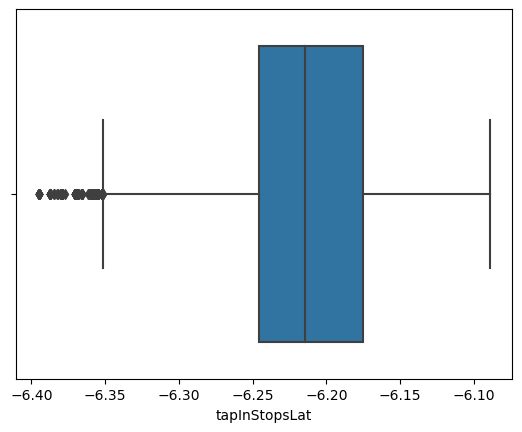

In [205]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data tapInStopsLat melalui visualisasi boxplot yang terlatak dibawah dari batas bawah boxplot 
sns.boxplot(data=df, x='tapInStopsLat');

In [206]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_tapInStopsLat = df['tapInStopsLat'].describe()['25%']
q3_tapInStopsLat = df['tapInStopsLat'].describe()['75%']
iqr_tapInStopsLat = q3_tapInStopsLat - q1_tapInStopsLat
iqr_tapInStopsLat

0.07033500000000004

In [207]:
# Mendefinisikan formula batas bawah minimum pada boxplot 
minimum_tapInStopsLat = q1_tapInStopsLat - (1.5 * iqr_tapInStopsLat)

In [208]:
# Mengetahui jumlah outliers pada tapInStopsLat yang terlatak di bawah dari batas bawah minimum boxplot
len(df[df['tapInStopsLat']<minimum_tapInStopsLat][['tapInStopsLat']])

395

***C. Cek Outliers pada tapInStopsLon***

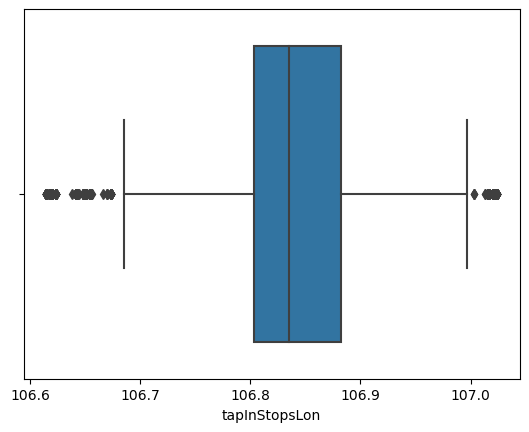

In [209]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data tapInStopsLon melalui visualisasi boxplot yang terlatak dibawah dari batas bawah boxplot 
# dan terletak diatas dari batas atas maksimum boxplot
sns.boxplot(data=df, x='tapInStopsLon');

In [210]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_tapInStopsLon = df['tapInStopsLon'].describe()['25%']
q3_tapInStopsLon = df['tapInStopsLon'].describe()['75%']
iqr_tapInStopsLon = q3_tapInStopsLon - q1_tapInStopsLon
iqr_tapInStopsLon


0.07880000000000109

In [211]:
# Mendefinisikan formula batas bawah minimum dan batas atas maksimum pada boxplot 
minimum_tapInStopsLon = q1_tapInStopsLon - (1.5 * iqr_tapInStopsLon)
maksimum_tapInStopsLon = q3_tapInStopsLon + (1.5 * iqr_tapInStopsLon)

In [212]:
# Mengetahui jumlah outliers pada tapInStopsLon yang terlatak di bawah dari batas bawah minimum boxplot
len(df[df['tapInStopsLon']<minimum_tapInStopsLon][['tapInStopsLon']])

342

In [213]:
# Mengetahui jumlah outliers pada tapInStopsLon yang terlatak di atas dari batas atas minimum boxplot
len(df[df['tapInStopsLon']>maksimum_tapInStopsLon][['tapInStopsLon']])

198

***D. Cek Outliers pada stopStartSeq***

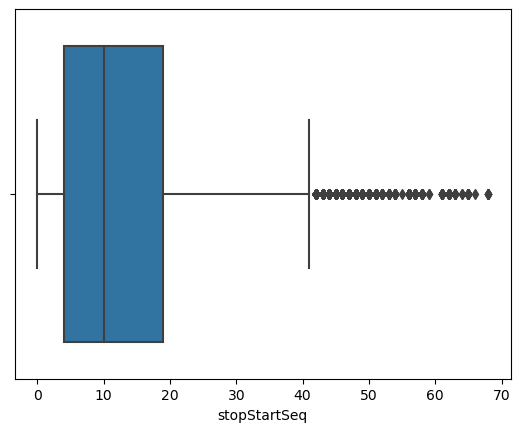

In [214]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data stopStartSeq melalui visualisasi boxplot yang terletak diatas dari batas atas maksimum boxplot
sns.boxplot(data=df, x='stopStartSeq');

In [215]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_stopStartSeq = df['stopStartSeq'].describe()['25%']
q3_stopStartSeq = df['stopStartSeq'].describe()['75%']
iqr_stopStartSeq = q3_stopStartSeq - q1_stopStartSeq
iqr_stopStartSeq

15.0

In [216]:
# Mendefinisikan formula batas atas maksimum pada boxplot 
maksimum_stopStartSeq = q3_stopStartSeq + (1.5 * iqr_stopStartSeq)

In [217]:
# Mengetahui jumlah outliers pada stopStartSeq yang terlatak di atas dari batas atas maksimum boxplot
len(df[df['stopStartSeq']>maksimum_stopStartSeq][['stopStartSeq']])

1486

***E. Cek Outliers pada tapOutStopsLat***

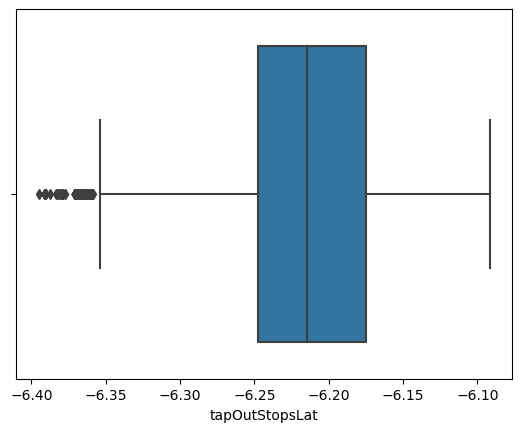

In [218]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data tapOutStopsLat melalui visualisasi boxplot yang terletak dibawah dari batas bawah minimum boxplot
sns.boxplot(data=df, x='tapOutStopsLat');

In [219]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_tapOutStopsLat = df['tapOutStopsLat'].describe()['25%']
q3_tapOutStopsLat = df['tapOutStopsLat'].describe()['75%']
iqr_tapOutStopsLat = q3_tapOutStopsLat - q1_tapOutStopsLat
iqr_tapOutStopsLat

0.07248900000000003

In [220]:
# Mendefinisikan formula batas bawah minimum pada boxplot 
minimum_tapOutStopsLat = q1_tapOutStopsLat - (1.5 * iqr_tapOutStopsLat)

In [221]:
# Mengetahui jumlah outliers pada tapOutStopsLat yang terlatak di bawah dari batas bawah minimum boxplot
len(df[df['tapOutStopsLat']<minimum_tapOutStopsLat][['tapOutStopsLat']])

359

***F. Cek Outliers pada tapOutStopsLon***

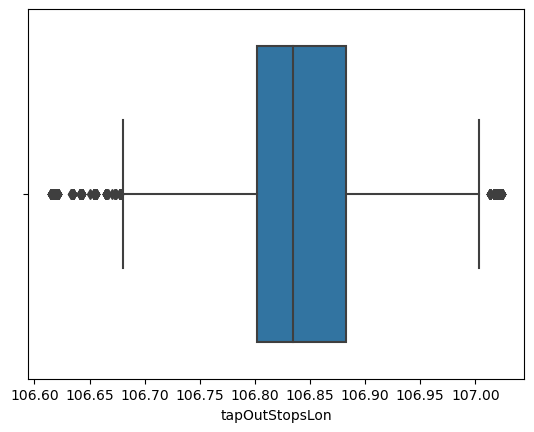

In [222]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data tapOutStopsLon melalui visualisasi boxplot yang terlatak dibawah dari batas bawah boxplot 
# dan terletak diatas dari batas atas maksimum boxplot
sns.boxplot(data=df, x='tapOutStopsLon');

In [223]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_tapOutStopsLon = df['tapOutStopsLon'].describe()['25%']
q3_tapOutStopsLon = df['tapOutStopsLon'].describe()['75%']
iqr_tapOutStopsLon = q3_tapOutStopsLon - q1_tapOutStopsLon
iqr_tapOutStopsLon

0.08128000000000668

In [224]:
# Mendefinisikan formula batas atas maksimum dan batas bawah minimum pada boxplot 
minimum_tapOutStopsLon = q1_tapOutStopsLon - (1.5 * iqr_tapOutStopsLon)
maksimum_tapOutStopsLon = q3_tapOutStopsLon + (1.5 * iqr_tapOutStopsLon)


In [225]:
# Mengetahui jumlah outliers pada tapOutStopsLon yang terlatak di bawah dari batas bawah minimum boxplot
len(df[df['tapOutStopsLon']<minimum_tapOutStopsLon][['tapOutStopsLon']])

291

In [226]:
# Mengetahui jumlah outliers pada tapOutStopsLon yang terlatak di atas dari batas atas maksimum boxplot
len(df[df['tapOutStopsLon']>maksimum_tapOutStopsLon][['tapOutStopsLon']])

158

***G. Cek Outliers pada stopEndSeq***

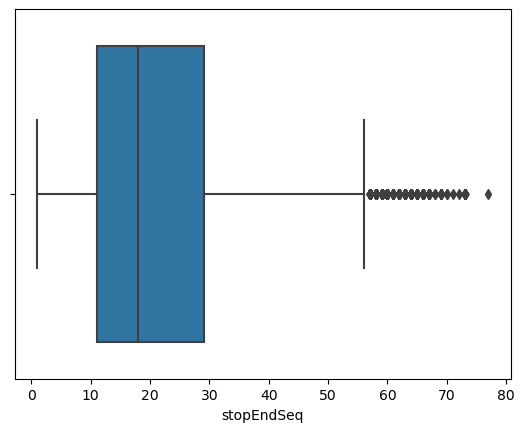

In [227]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data stopEndSeq melalui visualisasi boxplot yang terletak diatas dari batas atas maksimum boxplot
sns.boxplot(data=df, x='stopEndSeq');

In [228]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_stopEndSeq = df['stopEndSeq'].describe()['25%']
q3_stopEndSeq = df['stopEndSeq'].describe()['75%']
iqr_stopEndSeq = q3_stopEndSeq - q1_stopEndSeq
iqr_stopEndSeq

18.0

In [229]:
# Mendefinisikan formula batas atas maksimum  pada boxplot 
maksimum_stopEndSeq = q3_stopEndSeq + (1.5 * iqr_stopEndSeq)
maksimum_stopEndSeq

56.0

In [230]:
# Mengetahui jumlah outliers pada stopEndSeq yang terlatak di atas dari batas atas maksimum boxplot
len(df[df['stopEndSeq']>maksimum_stopEndSeq][['stopEndSeq']])

583

*****H. Cek Outliers pada payAmount*****

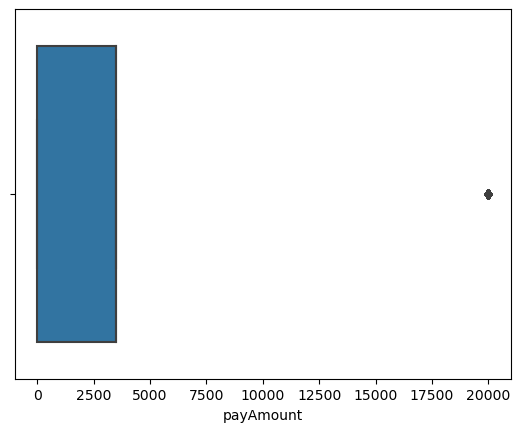

In [231]:
# Mengetahui outliers melalui visualisasi boxplot
# Terdapat outliers pada data payAmount melalui visualisasi boxplot yang terletak diatas dari batas atas maksimum boxplot
sns.boxplot(data=df, x='payAmount');

In [232]:
# Mendefinisikan rumus Interquartil Range (IQR) sebagai prasyarat untuk mengetahui jumlah outliers
q1_payAmount = df['payAmount'].describe()['25%']
q3_payAmount = df['payAmount'].describe()['75%']
iqr_payAmount = q3_payAmount - q1_payAmount
iqr_payAmount

3500.0

In [233]:
# Mendefinisikan formula batas atas maksimum  pada boxplot 
maksimum_payAmount = q3_payAmount + (1.5 * iqr_payAmount)
maksimum_payAmount

8750.0

In [234]:
# Mengetahui jumlah outliers pada stopEndSeq yang terlatak di atas dari batas atas maksimum boxplot
len(df[df['payAmount']>maksimum_payAmount][['payAmount']])

1687

**Insight Outlier**
- Dari jumlah outlier yang telah ditampilkan dari masing-masing data numerik maka saya memutuskan untuk tidak melakukan handling / tidak menghapus outlier dikarenakan penghapusan outlier berpotensi akan menghapus sejumlah informasi penting pada data sehingga dapat menganggu dalam proses analisis data

## **C. Cek Data Duplikat**

In [235]:
# Melihat jumlah data yang berduplikat
# Tidak terdapat data yang berduplikat maka tidak perlu melakukan drop terhadap data yang berduplikat
df.duplicated().sum()

0

## **2. Exploratory Data Analysis (EDA)**

## **A. Summary statistics**
- Tujuan summary statistik adalah untuk menampilkan statistik deskriptif dari data yang bersifat numerik

In [236]:
df.describe()

,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,36556.000000,36556.000000,36556.000000,36556.000000,36556,36556.000000,36556.000000,36556.000000,36556,36556.000000
mean,0.500602,-6.214851,106.841533,13.565242,2023-04-16 08:07:37.172557312,-6.214651,106.841233,21.219909,2023-04-16 09:19:44.697997568,2724.573257
min,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:02:53.249999872,-6.247225,106.801750,11.000000,2023-04-10 10:18:06.249999872,0.000000
50%,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:41:12,-6.214718,106.834580,18.000000,2023-04-16 19:03:14,3500.000000
75%,1.000000,-6.175528,106.882270,19.000000,2023-04-21 21:52:38.500000,-6.174736,106.883030,29.000000,2023-04-21 23:26:00.249999872,3500.000000
max,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000
std,0.500006,0.057871,0.060367,12.231801,NaN,0.059022,0.060999,13.800689,NaN,4164.390129


## **B. Korelasi**
- Tujuan melakukan korelasi adalah untuk mengetahui apakah terdapat hubungan antara data numerik satu sama lain yang dapat menjadi referensi untuk proses analisis selanjutnya
- Korelasi hanya berlaku untuk dua data yang bersifat numerik (X1 dan X2)
- Ketentuan nilai korelasi:
    - Nilai korelasi yang mendekati 1 atau -1 menunjukkan hubungan yang sangat kuat antar kedua data numerik
    - Nilai korelasi yang mendekati 0 menunjukkan hubungan yang lemah antar kedua data numerik
    - Nilai korelasi positif menginterpretasikan semakin besar nilai X1 maka akan diikuti dengan semakin besarnya juga nilai pada X2
    - Nilai korelasi negatif menginterpretasikan semakin besar nilai X1 maka akan nilai pada X2 akan menurun dan menunjukkan hubungan yang berbanding terbalik
    

In [237]:
# Melihat tabel nilai korelasi antar data numerik
df.corr(numeric_only=True)

,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
direction,1.000000,0.002087,-0.008807,-0.052064,-0.058007,0.045972,-0.044204,0.000891
tapInStopsLat,0.002087,1.000000,0.024730,-0.002537,0.899224,0.033296,-0.012108,-0.123002
tapInStopsLon,-0.008807,0.024730,1.000000,0.041426,0.035634,0.892529,0.080392,-0.190589
stopStartSeq,-0.052064,-0.002537,0.041426,1.000000,-0.017807,0.037464,0.825642,-0.250049
tapOutStopsLat,-0.058007,0.899224,0.035634,-0.017807,1.000000,0.016244,-0.025369,-0.141093
tapOutStopsLon,0.045972,0.033296,0.892529,0.037464,0.016244,1.000000,0.073888,-0.192249
stopEndSeq,-0.044204,-0.012108,0.080392,0.825642,-0.025369,0.073888,1.000000,-0.323963
payAmount,0.000891,-0.123002,-0.190589,-0.250049,-0.141093,-0.192249,-0.323963,1.000000


Text(0.5, 1.0, 'Correlation of Numeric Values')

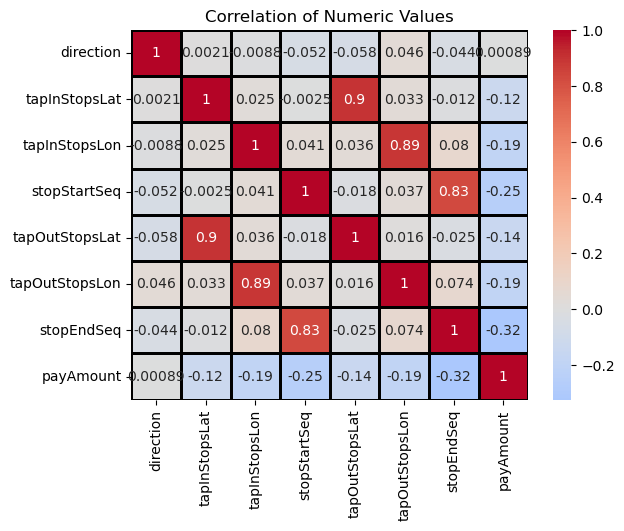

In [239]:
# Melihat korelasi dengan visualisasi heatmap
sns.heatmap(data=df.corr(numeric_only=True),
            annot=True,
            cmap= 'coolwarm',
            center = 0,
            linecolor = 'black',
            linewidths = 1)

plt.title('Correlation of Numeric Values')

**Insight korelasi**
- Secara keseluruhan tidak ada hubungan yang kuat antar kedua data numerik. Hal tersebut dapat dilihat dari mayoritas nilai korelasi yang mendekati angka 0
- Hal tersebut dapat diinterpretasikan bahwa tidak terdapat hubungan antar kedua data numerik
- Namun terdapat nilai korelasi tertinggi (menunjukkan hubungan kuat) yang dimiliki oleh hubungan antara data sesama data Latitude dari tapIn dan tapOut
- Nilai pada korelasi tersebut bernilai 0.9 dan dapat diinterpretasikan bahwa semakin besar nilai Latitude pada tapIn maka akan diikuti dengan semakin besarnya juga nilai pada Latitude pada aktivitas TapOut 

## **3. Analisis dan Visualisasi Data**

In [240]:
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## **A. Mengetahui Rute Transjakarta yang Ramai dilalui oleh Pengguna**

***A.1 Mengetahui rute (corridorID) beserta nama rute (corridorName) yang paling banyak dan sedikit dilalui oleh pengguna Transjakarta***

In [241]:
# Mengetahui nama rute yang ramai dilalui oleh pengguna
count_terminal_head = df[['corridorName']].value_counts().head(5)
count_terminal_head


corridorName                           
Cibubur - Balai Kota                       2229
Ciputat - CSW                               371
Harmoni - Jakarta International Stadium     329
Pulo Gadung - Monas                         328
Kampung Rambutan - Pondok Gede              324
Name: count, dtype: int64

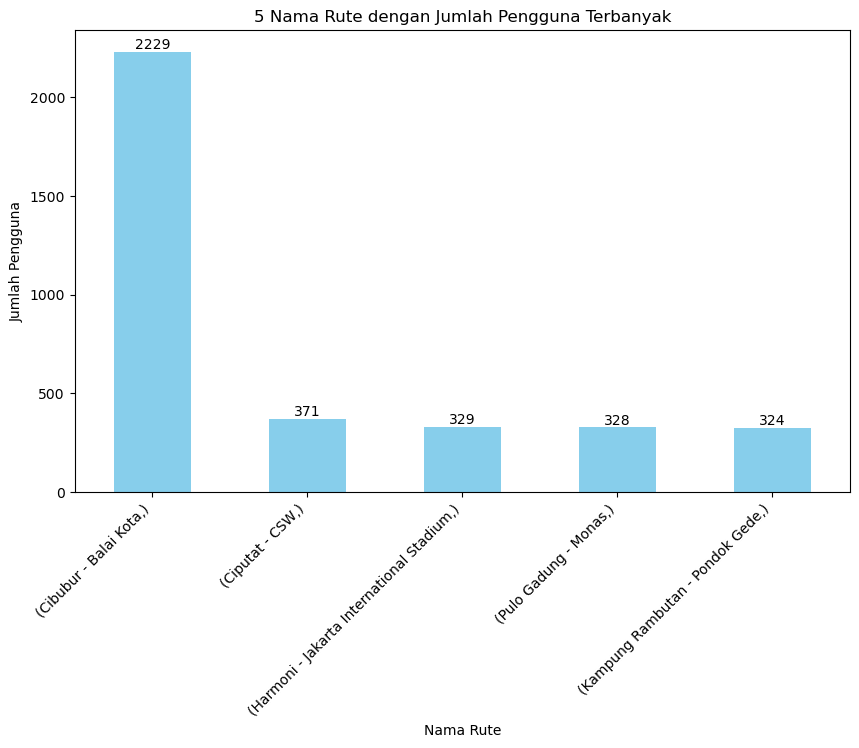

In [291]:
# Membuat visualisasi jumlah pengguna terbanyak berdasarkan nama rute
plt.figure(figsize=(10, 6))
count_terminal_head.plot(kind='bar', color='skyblue')
plt.title('5 Nama Rute dengan Jumlah Pengguna Terbanyak')
plt.xlabel('Nama Rute')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi untuk setiap bar
for i, value in enumerate(count_terminal_head):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')

plt.show()

In [243]:
# Mengetahui nama rute yang sedikit dilalui oleh pengguna
count_terminal_tail = df[['corridorName']].value_counts().tail(5)
count_terminal_tail

corridorName                                  
Gondangdia - Balai Kota                           39
Senen - Tanah Abang                               38
Term. Pulo Gadung - Lampiri                       31
Tanah Abang - Kebayoran Lama via Pos Pengumben    21
Kampung Rambutan - Blok M                         17
Name: count, dtype: int64

In [244]:
# Mengetahui kode rute yang ramai dilalui oleh pengguna
count_rute_head = df[['corridorID']].value_counts().head(5)
count_rute_head


corridorID
1T            1589
S21            376
JIS3           332
JAK.06         327
11P            323
Name: count, dtype: int64

In [245]:
# Mengetahui kode rute yang sedikit dilalui oleh pengguna
count_rute_tail = df[['corridorID']].value_counts().tail(5)
count_rute_tail

corridorID
1R            38
JAK.99        31
JAK.12        22
7B            16
M5            15
Name: count, dtype: int64

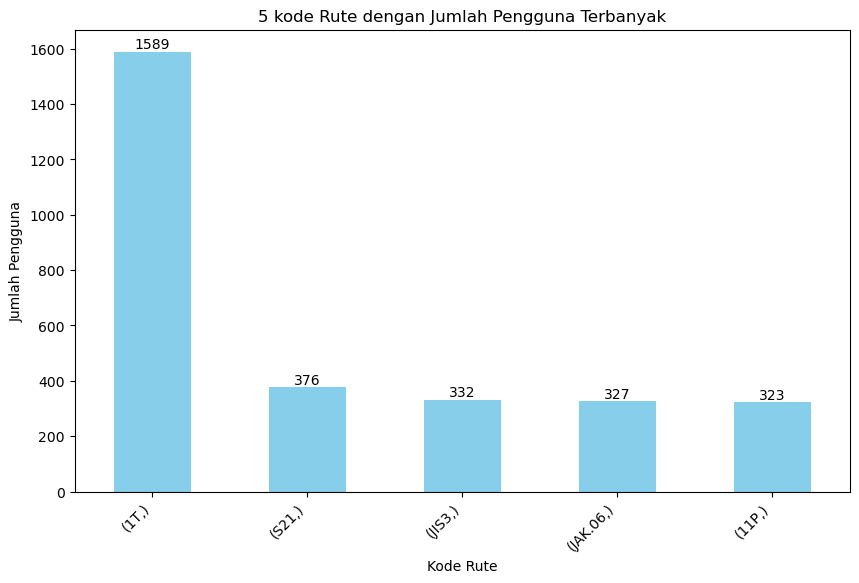

In [292]:
# Membuat visualisasi jumlah pengguna terbanyak berdasarkan kode rute
plt.figure(figsize=(10, 6))
count_rute_head.plot(kind='bar', color='skyblue')
plt.title('5 kode Rute dengan Jumlah Pengguna Terbanyak')
plt.xlabel('Kode Rute')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi untuk setiap bar
for i, value in enumerate(count_rute_head):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')
    
plt.show()

**Insight jumlah pengguna berdasarkan rute**
- Rute 1T dengan nama rute Cibubur - Balai kota merupakan rute yang paling ramai dilalui oleh pengguna Transjakarta dengan sejumlah 1845 pengguna selama bulan April 2023
- Sedangkan rute M5 dengan nama rute Kebayoran Lama - Tanah Abang merupakan rute yang sedikit dilalui oleh pengguna Transjakarta dengan hanya sejumlah 15 pengguna bulan April 2023
- Rute S21 hingga 11P memiliki perbedaan jumlah pengguna yang tidak terlalu signifikan satu sama lainnya

## **B. Mengetahui jumlah pengguna Transjakarta berdasarkan waktunya**

***B.1 Mengetahui jumlah pengguna Transjakarta  yang melakukan tap in per harian selama bulan April 2023 (tapInTime)***

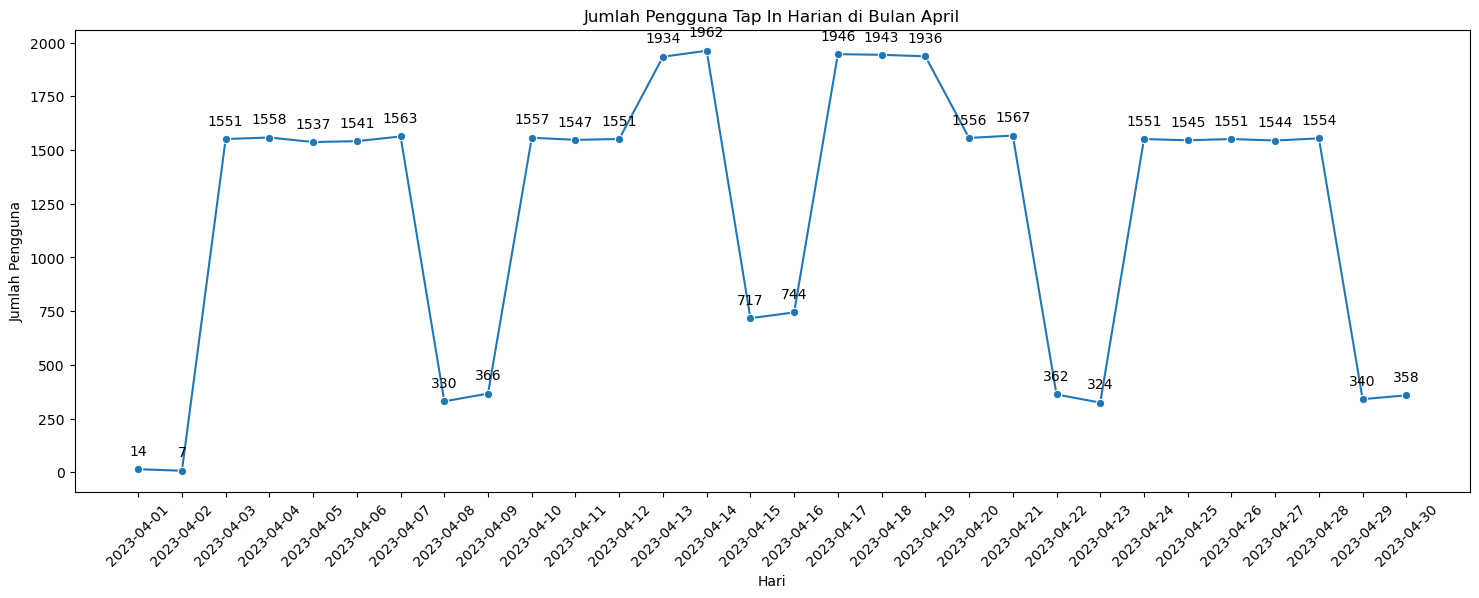

In [247]:
# Membuat visualisasi lineplot untuk mengetahui tren serta jumlah pengguna Transjakarta yang melakukan tap in per harian
# selama bulan April 2023

# Filter data hanya untuk bulan April
df_april = df[(df['tapInTime'] >= '2023-04-01') & (df['tapInTime'] < '2023-05-01')]

# Buat kolom baru untuk menyimpan informasi harian
df_april['Day'] = df_april['tapInTime'].dt.strftime('%Y-%m-%d')

# Hitung jumlah transaksi per hari
daily_counts = df_april['Day'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')

# Menambahkan anotasi pada setiap titik
for i, value in enumerate(daily_counts.values):
    plt.annotate(str(value), (daily_counts.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Jumlah Pengguna Tap In Harian di Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

**Insight jumlah pengguna yang melakukan tap in per harian selama bulan April 2023**
- Jumlah pengguna Transjakarta terbanyak yang melakukan tap in terjadi pada Kamis, 13 April 2023
- Sedangkan jumlah pengguna Transjakarta yang sedikit melakukan tap in terjadi pada:
    - Sabtu, 1 April 2023
    - Minggu, 2 April 2023

***B.2 Mengetahui jumlah pengguna Transjakarta yang melakukan tap out per harian selama bulan April 2023 (tapOutTime)***

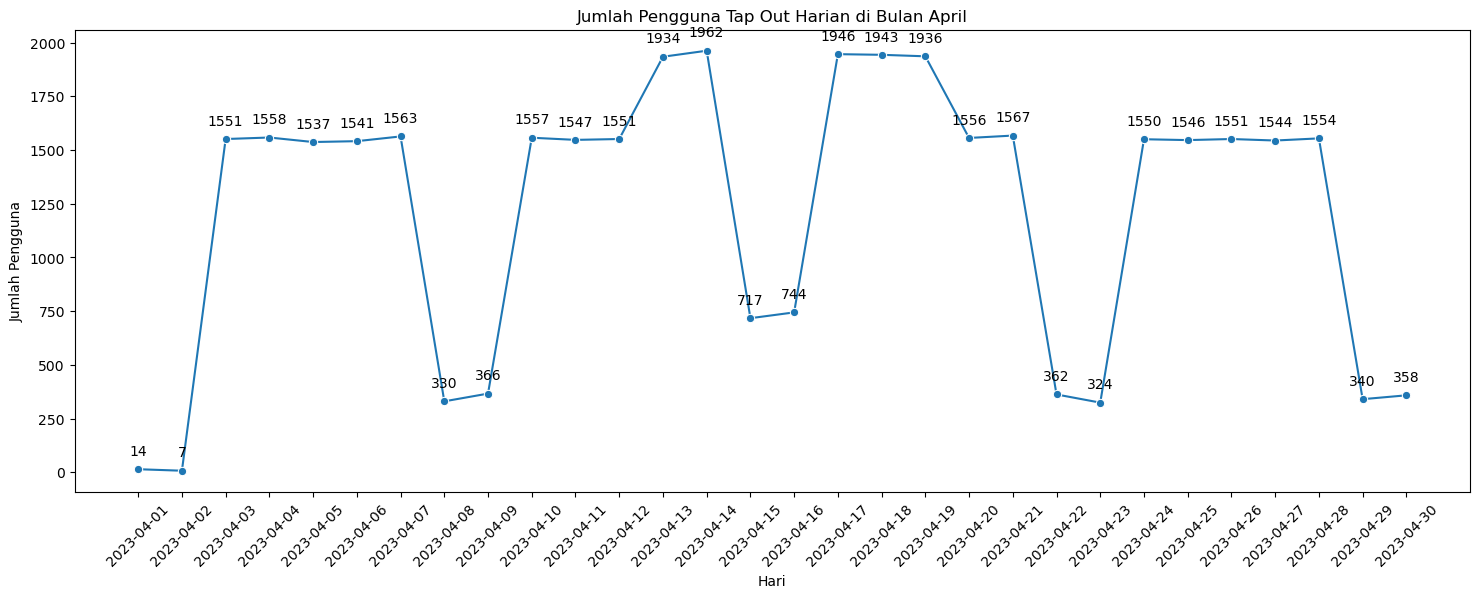

In [248]:
# Membuat visualisasi lineplot untuk mengetahui tren serta jumlah pengguna Transjakarta yang melakukan tap out per harian
# selama bulan April 2023

# Filter data hanya untuk bulan April
df_april = df[(df['tapOutTime'] >= '2023-04-01') & (df['tapOutTime'] < '2023-05-01')]

# Buat kolom baru untuk menyimpan informasi harian
df_april['Day'] = df_april['tapOutTime'].dt.strftime('%Y-%m-%d')

# Hitung jumlah transaksi per hari
daily_counts = df_april['Day'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')

# Menambahkan anotasi pada setiap titik
for i, value in enumerate(daily_counts.values):
    plt.annotate(str(value), (daily_counts.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Jumlah Pengguna Tap Out Harian di Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()


**Insight jumlah pengguna yang melakukan tap out per harian selama bulan April 2023**
- Jumlah pengguna Transjakarta terbanyak yang melakukan tap out terjadi pada Kamis, 13 April 2023 
- Sedangkan jumlah pengguna Transjakarta yang sedikit melakukan tap out terjadi pada:
    - Sabtu, 1 April 2023
    - Minggu, 2 April 2023

***B.3 Mengetahui jumlah pengguna Transjakarta  yang melakukan tap in berdasarkan rata-rata jam selama bulan April 2023 (tapInTime)***

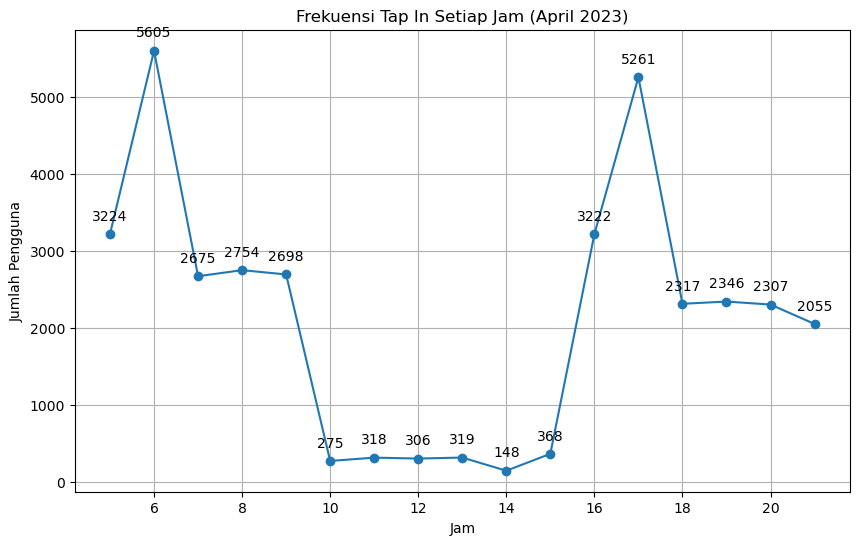

In [249]:
# Membuat visualisasi lineplot untuk mengetahui tren serta jumlah pengguna Transjakarta yang melakukan tap in berdasarkan rata-rata jam 
# selama bulan April 2023

# Ekstrak jam dari kolom 'TapInTime'
df['tapInHour'] = df['tapInTime'].dt.hour

# Filter data untuk satu bulan (misalnya, April 2023)
start_date = '2023-04-01'
end_date = '2023-04-30'
df_filtered = df[(df['tapInTime'] >= start_date) & (df['tapInTime'] <= end_date)]

# Hitung frekuensi setiap jam
hourly_counts = df_filtered['tapInHour'].value_counts().sort_index()

# Plot line
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Frekuensi Tap In Setiap Jam (April 2023)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)

# Menambahkan nilai anotasi pada setiap titik
for i, txt in enumerate(hourly_counts.values):
    plt.annotate(txt, (hourly_counts.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.show()

**Insight jumlah pengguna yang melakukan tap in berdasarkan rata-rata jam selama bulan April 2023**
- Jumlah pengguna Transjakarta terbanyak yang melakukan tap in terjadi pada jam 06.00 pagi dan 17.00 sore
- Sedangkan jumlah pengguna Transjakarta yang sedikit melakukan tap in terjadi pada jam 14.00 siang
    

***B.4 Mengetahui jumlah pengguna Transjakarta yang melakukan tap out berdasarkan rata-rata jam selama bulan April 2023 (tapInTime)***

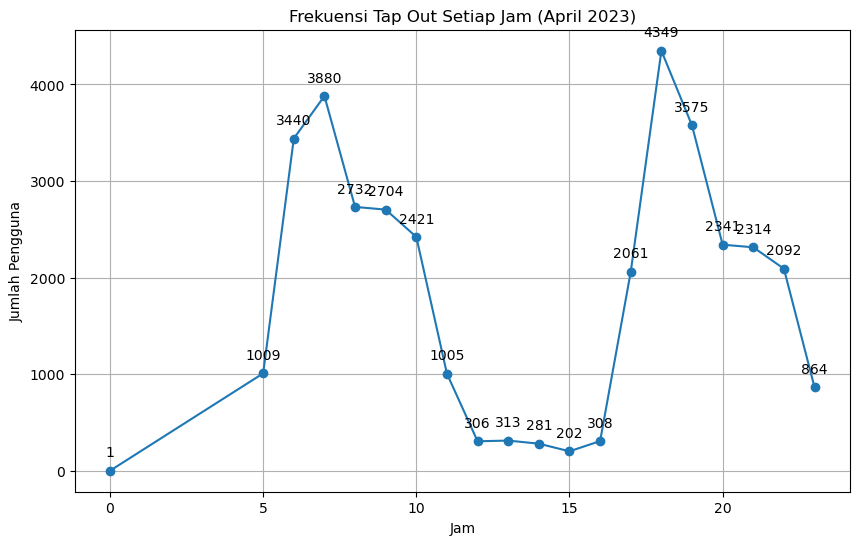

In [250]:
# Membuat visualisasi lineplot untuk mengetahui tren serta jumlah pengguna Transjakarta yang melakukan tap out berdasarkan rata-rata jam 
# selama bulan April 2023

# Ekstrak jam dari kolom 'TapInTime'
df['tapOutHour'] = df['tapOutTime'].dt.hour

# Filter data untuk satu bulan (misalnya, April 2023)
start_date = '2023-04-01'
end_date = '2023-04-30'
df_filtered = df[(df['tapOutTime'] >= start_date) & (df['tapOutTime'] <= end_date)]

# Hitung frekuensi setiap jam
hourly_counts = df_filtered['tapOutHour'].value_counts().sort_index()

# Plot line
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Frekuensi Tap Out Setiap Jam (April 2023)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)

# Menambahkan nilai anotasi pada setiap titik
for i, txt in enumerate(hourly_counts.values):
    plt.annotate(txt, (hourly_counts.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.show()

**Insight jumlah pengguna yang melakukan tap out berdasarkan rata-rata jam selama bulan April 2023**
- Jumlah pengguna Transjakarta terbanyak yang melakukan tap out terjadi pada jam 18.00 sore
- Sedangkan jumlah pengguna Transjakarta yang sedikit melakukan tap in terjadi pada jam 15.00 siang
    

**Kesimpulan**
- Line plot dari jumlah pengguna yang melakukan tapIn dan tapOut berdasarkan harian selama bulan April 2023 memiliki kemiripan pola antar keduanya dan hanya berbeda dari segi jumlah pengguna
- Pola yang mirip antar kedua plot tapIn dengan tapOut mengimplementasikan bahwa tentunya dalam sehari ketika seorang pengguna melakukan keberangkatan dengan Transjakarta (tapIn) kemanapun arahnya berdasarkan rute yang diambil maka tentunya pengguna tersebut akan berhenti (tapOut) dengan tujuan untuk melanjutkan perjalanan dengan transit atau tidak lagi melanjutkan perjalanan dengan Transjakarta dimanapun lokasinya sesuai dengan rute tempat pengguna melakukan pemberhentian Bus tersebut
- Pada saat Weekdays (Hari kerja Senin hingga Jum'at) cenderung memiliki jumlah pengguna yang lebih banyak dibandingkan pada saat Weekend (Sabtu dan Minggu) dikarenakan pada saat Weekdays tentu nya pengguna banyak yang menggunakan Transjakarta untuk keperluan pulang pergi ke tempat kerja. Sedangkan pada saat Weekend pengguna cenderung tidak banyak yang menggunakan Transjakarta karena tidak termasuk ke dalam jadwal bekerja. 
- Jika dilihat pada plot maka ketika pada tanggal 12 hingga 19 April 2023 terjadi jumlah pengguna yang sangat banyak. Menurut berita yang tertera pada link https://www.liputan6.com/news/read/5263970/libur-lebaran-idul-fitri-2023-polda-metro-tiadakan-ganjil-genap-di-jakarta-mulai-19-april-2023?page=2 pada rentang tanggal tersebut sedang terjadi kenaikan arus kendaraan menjelang hari raya Idul Fitri sehingga saya berasumsi pengguna lebih memilih untuk menggunakan Transjakarta untuk menghindari macet
- Line plot dari jumlah pengguna yang melakukan tapIn dan tapOut berdasarkan rata-rata jam selama bulan April 2023 juga memiliki kemiripan pola antar keduanya dan hanya berbeda dari segi jumlah pengguna
- Rata-rata pengguna yang menggunakan Transjakarta terbanyak jatuh pada pukul 06.00 pagi dan pukul 17.00 sore. Hal tersebut menurut saya terjadi karena pada saat pukul 6 pagi, masyarakat cenderung mulai berangkat ke tempat kerja. Begitupun sebaliknya, ketika pada saat pukul 5 sore maka masyarakat cenderung mulai kembali dari tempat kerja menuju rumah masing-masing

## **C. Mengetahui informasi Transjakarta berdasarkan data dari setiap pengguna**

***C.1 Mengetahui jumlah pengguna Transjakarta  berdasarkan gender (payCardSex) dan jenis transaksi yang digunakan (payCardBank)***

In [251]:
# Mengetahui jumlah pengguna Transjakarta berdasarkan gender 
count_sex = df[['payCardSex']].value_counts()
count_sex

payCardSex
F             19469
M             17087
Name: count, dtype: int64

Text(0.5, 1.0, 'Jumlah Pengguna Transjakarta Berdasarkan Gender')

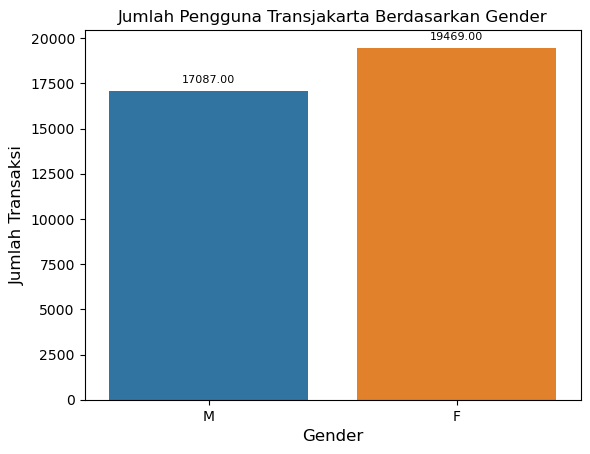

In [252]:
# Membuat visualisasi Barplot jumlah pengguna Transjakarta berdasarkan gender
plots = sns.countplot(data=df, x='payCardSex')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),             
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',            
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)

plt.title('Jumlah Pengguna Transjakarta Berdasarkan Gender')

In [253]:
# Mengetahui jumlah pengguna Transjakarta berdasarkan jenis transaksi 
count_bank = df[['payCardBank']].value_counts()
count_bank

payCardBank
dki            18058
emoney          6639
brizzi          3397
flazz           3106
online          2775
bni             2581
Name: count, dtype: int64

Text(0.5, 1.0, 'Jumlah Pengguna Transjakarta Berdasarkan Jenis Transaksi')

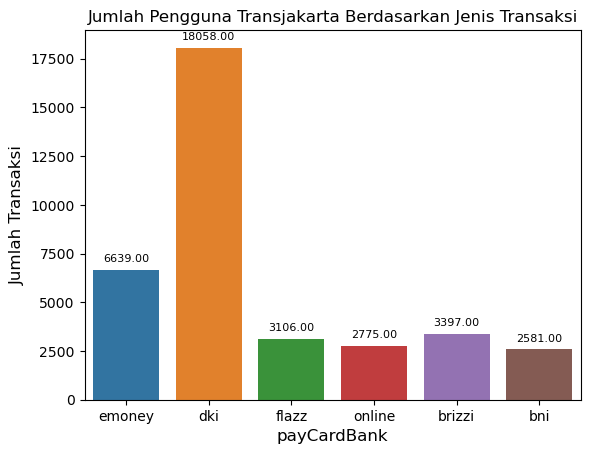

In [254]:
# Membuat visualisasi Barplot jumlah pengguna Transjakarta berdasarkan jenis transaksi
plots = sns.countplot(data=df, x='payCardBank')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),             
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',            
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('payCardBank', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)

plt.title('Jumlah Pengguna Transjakarta Berdasarkan Jenis Transaksi')

Text(0.5, 1.0, 'Jumlah Pengguna Transjakarta Berdasarkan Jenis Transaksi pada setiap Gender')

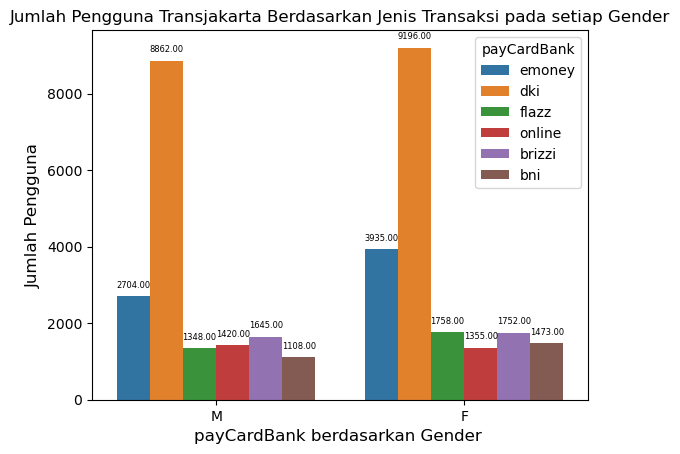

In [255]:
# Membuat visualisasi Barplot jumlah pengguna Transjakarta berdasarkan jenis transaksi yang disesuaikan dengan masing-masing gender
plots = sns.countplot(data=df, x='payCardSex', hue='payCardBank')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),             
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                
                   size=6, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('payCardBank berdasarkan Gender ', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)

plt.title('Jumlah Pengguna Transjakarta Berdasarkan Jenis Transaksi pada setiap Gender')

**Insight jumlah pengguna Transjakarta berdasarkan gender dan jenis transaksi**
- Gender perempuan merupakan pengguna yang paling banyak menggunakan Transjakarta yang berjumlah 20.157 pengguna dibandingkan dengan gender pria yang berjumlah 17.743 pengguna
- Pengguna Transjakarta yang menggunakan transaksi dengan Bank DKI merupakan pengguna terbanyak dibandingkan dengan pengguna dari jenis transaksi lainnya pada setiap gender nya
- Jumlah pengguna Transjakarta yang menggunakan jenis transaksi Flazz, Online, Brizzi, dan BNI tidak terlalu berbeda signifikan satu sama lainnya

***C.2 Mengetahui jumlah pengguna Transjakarta  berdasarkan tahun kelahiran (payCardBirthDate)***

In [256]:
# Mengetahui pengguna Transjakarta yang paling tua
df[['payCardBirthDate']].min()

payCardBirthDate    1946
dtype: object

In [257]:
# Mengetahui pengguna Transjakarta yang paling muda
df[['payCardBirthDate']].max()

payCardBirthDate    2012
dtype: object

In [258]:
count_ultah_head= df[['payCardBirthDate']].value_counts().head(5)
count_ultah_head

payCardBirthDate
1981                1344
1992                1343
1994                1311
1987                1250
1985                1204
Name: count, dtype: int64

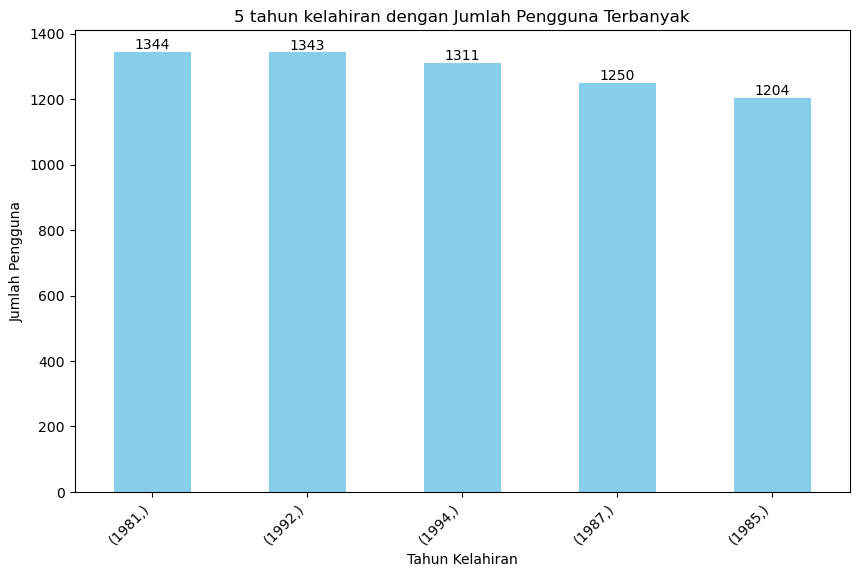

In [259]:
# Membuat visualisasi jumlah pengguna terbanyak berdasarkan tahun kelahiran
plt.figure(figsize=(10, 6))
count_ultah_head.plot(kind='bar', color='skyblue')
plt.title('5 tahun kelahiran dengan Jumlah Pengguna Terbanyak')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi untuk setiap bar
for i, value in enumerate(count_ultah_head):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')

plt.show()

In [260]:
# Mengetahui jumlah pengguna Transjakarta berdasarkan tahun kelahiran yang terdaftar pada kartu transaksi
count_ultah = df[['payCardBirthDate']].value_counts()
count_ultah

payCardBirthDate
1981                1344
1992                1343
1994                1311
1987                1250
1985                1204
                    ... 
1949                   8
1955                   5
1958                   4
1954                   4
1950                   1
Name: count, Length: 67, dtype: int64

**Insight jumlah pengguna Transjakarta berdasarkan tahun kelahiran**
- Mayoritas pengguna Transjakarta terbanyak adalah pengguna yang sudah berusia dewasa dari rentang kelahiran 1981 hingga 1994
- Jumlah pengguna Transjakarta yang sedikit dimiliki oleh pengguna yang telah berusia manula, yaitu dengan rentang kelahiran 1950 hingga 1949
- Usia pengguna Transjakarta tertua adalah yang lahir pada tahun 1946
- Sedangkan usia pengguna Transjakarta termuda lahir pada tahun 2012

***C.3 Menampilkan 5 pengguna terbanyak Transjakarta berdasarkan nama (payCardName)***

In [261]:
# Mengetahui jumlah pengguna terbanyak berdasarkan nama pengguna 
count_nama_head = df[['payCardName']].value_counts().head(5)
count_nama_head

payCardName       
Fathonah Saefullah    79
Suci Wacana           75
Cengkal Lestari       44
Rahayu Prabowo        44
Suci Hutagalung       42
Name: count, dtype: int64

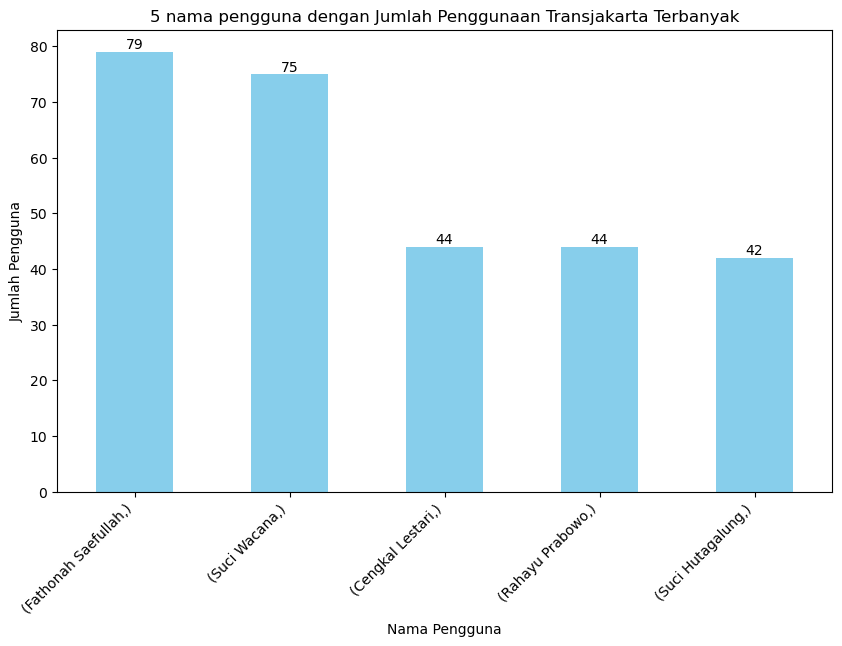

In [262]:
# Membuat visualisasi jumlah pengguna terbanyak berdasarkan tahun kelahiran
plt.figure(figsize=(10, 6))
count_nama_head.plot(kind='bar', color='skyblue')
plt.title('5 nama pengguna dengan Jumlah Penggunaan Transjakarta Terbanyak')
plt.xlabel('Nama Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi untuk setiap bar
for i, value in enumerate(count_nama_head):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')

plt.show()

In [263]:
# Mengetahui jenis transaksi pada Fathonah Saefullah
df[df['payCardName'] == 'Fathonah Saefullah'][['payCardBank']].value_counts()

payCardBank
flazz          40
dki            39
Name: count, dtype: int64

In [264]:
# Mengetahui jenis transaksi pada Suci Wacana
df[df['payCardName'] == 'Suci Wacana'][['payCardBank']].value_counts()

payCardBank
dki            75
Name: count, dtype: int64

In [265]:
# Mengetahui jenis transaksi pada Cengkal Lestari
df[df['payCardName'] == 'Cengkal Lestari'][['payCardBank']].value_counts()

payCardBank
online         40
flazz           4
Name: count, dtype: int64

In [266]:
# Mengetahui jenis transaksi pada Rahayu Prabowo
df[df['payCardName'] == 'Rahayu Prabowo'][['payCardBank']].value_counts()

payCardBank
dki            40
emoney          4
Name: count, dtype: int64

In [267]:
# Mengetahui jenis transaksi pada Suci Hutagalung
df[df['payCardName'] == 'Suci Hutagalung'][['payCardBank']].value_counts()

payCardBank
dki            42
Name: count, dtype: int64

In [268]:
# Mengetahui jumlah pengguna yang paling sedikit menggunakan Transjakarta berdasarkan nama pengguna
count_nama_tail = df[['payCardName']].value_counts().tail(5)
count_nama_tail

payCardName     
Indah Hasanah       1
Asirwanda Rajasa    1
Tina Ramadan        1
Tina Hardiansyah    1
Tania Maulana       1
Name: count, dtype: int64

In [269]:
# Mengetahui jenis transaksi pada Indah Hasanah
df[df['payCardName'] == 'Indah Hasanah'][['payCardBank']].value_counts()

payCardBank
flazz          1
Name: count, dtype: int64

In [270]:
# Mengetahui jenis transaksi pada Asirwanda Rajasa
df[df['payCardName'] == 'Asirwanda Rajasa'][['payCardBank']].value_counts()

payCardBank
brizzi         1
Name: count, dtype: int64

In [271]:
# Mengetahui jenis transaksi pada Tina Ramadan
df[df['payCardName'] == 'Tina Ramadan'][['payCardBank']].value_counts()

payCardBank
flazz          1
Name: count, dtype: int64

In [272]:
# Mengetahui jenis transaksi pada Tina Hardiansyah
df[df['payCardName'] == 'Tina Hardiansyah'][['payCardBank']].value_counts()

payCardBank
dki            1
Name: count, dtype: int64

In [273]:
# Mengetahui jenis transaksi pada Tania Maulana
df[df['payCardName'] == 'Tania Maulana'][['payCardBank']].value_counts()

payCardBank
emoney         1
Name: count, dtype: int64

**Insight jumlah pengguna berdasarkan nama pengguna**
- Pengguna atas nama Fathonah Saefullah merupakan pengguna yang paling banyak menggunakan jasa Transjakarta selama bulan April 2023 dengan sebanyak 79 kali dibandingkan dengan pengguna lainnya
- Jika dilihat dari jenis transaksi yang digunakan oleh 5 pengguna Transjakarta terbanyak berdasarkan nama pengguna maka 5 dari mereka mayoritas lebih banyak yang menggunakan transaksi dengan Bank DKI. Hal tersebut relevan dengan analisis mengenai jumlah pengguna berdasarkan jenis transaksi yang telah disebutkan pada pembahasan sebelumnya bahwa memang benar transaksi dengan Bank DKI memegang jumlah yang paling banyak dibandingkan dengan jenis transaksi lainnya.
- Sedangkan atas 5 pengguna atas nama Indah Hasanah hingga Tania Maulana merupakan 5 pengguna yang paling sedikit menggunakan jasa Transjakarta dengan masing2 pengguna hanya pernah menggunakan sebanyak sekali saja selama bulan April 2023

**C.4 Melihat rata-rata pengeluaran biaya Transjakarta setiap gender**

In [274]:
# Mengetahui kategori biaya pengeluaran Transjakarta
df[['payAmount']].value_counts()

payAmount
3500.0       18817
0.0          16052
20000.0       1687
Name: count, dtype: int64

In [275]:
# Mengetahui rata-rata pengeluaran biaya Transjakarta setiap gender
df.groupby(by='payCardSex')['payAmount'].mean()

payCardSex
F    2706.199599
M    2745.508281
Name: payAmount, dtype: float64

In [276]:
groupby_rata = df.groupby(by='payCardSex')['payAmount'].mean()

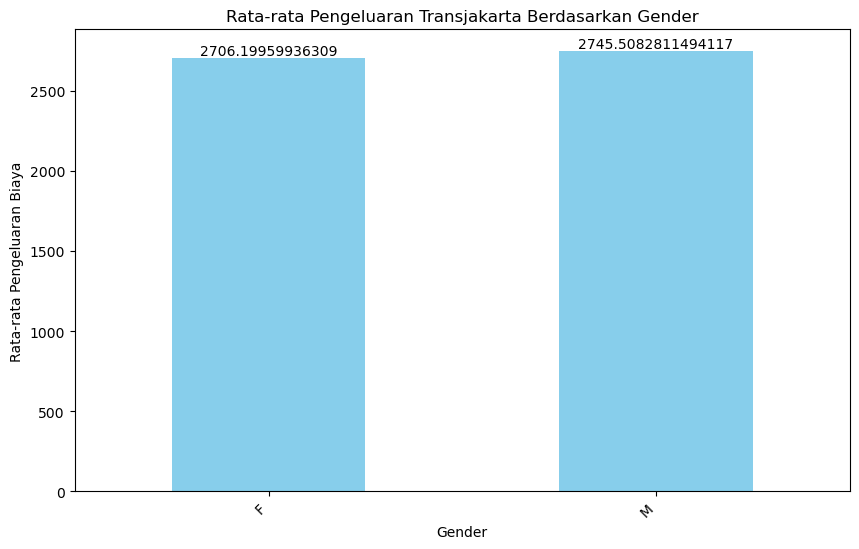

In [277]:
# Membuat visualisasi rata-rata pengeluaran Transjakarta berdasarkan gender
plt.figure(figsize=(10, 6))
ax = groupby_rata.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Pengeluaran Transjakarta Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Pengeluaran Biaya')
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi pada setiap batang bar
for i, count in enumerate(groupby_rata):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [278]:
# Jumlah pengguna yang melakukan transaksi Transjakarta dengan gratis pada setiap gender
df[df['payAmount']==0.0][['payCardSex']].value_counts()

payCardSex
F             8715
M             7337
Name: count, dtype: int64

In [279]:
df[df['payAmount']==3500][['payCardSex']].value_counts()

payCardSex
F             9842
M             8975
Name: count, dtype: int64

In [280]:
df[df['payAmount']==20000][['payCardSex']].value_counts()

payCardSex
F             912
M             775
Name: count, dtype: int64

**Insight rata-rata pengeluaran biaya Transjakarta berdasarkan gender**
- Rata-rata pengeluaran biaya Transjakarta dari setiap gender tidak memiliki perbedaan signifikan satu sama lain.
- Namun jika dibandingkan maka gender pria cenderung memiliki rata-rata pengeluaran biaya Transjakarta yang lebih banyak dibandingkan dengan gender wanita
- Menurut saya, jumlah pengeluaran pria yang lebih banyak dari wanita tersebut dapat disebabkan oleh lebih banyaknya proporsi gender wanita yang melakukan transaksi dengan gratis (payAmount = 0.0) yaitu sejumlah 8715 pengguna dibandingkan dengan gender pria yang melakukan transaksi dengan gratis sejumlah 7337 pengguna pria dan tentu nya hal tersebut akan berpengaruh terhadap perhitungan dari nilai rata-rata pengeluaran biaya Transjakarta per masing-masing gender

## **D. Visualisasi Scatterplot Data Numerik**

Text(0.5, 1.0, 'Correlation of Numeric Values')

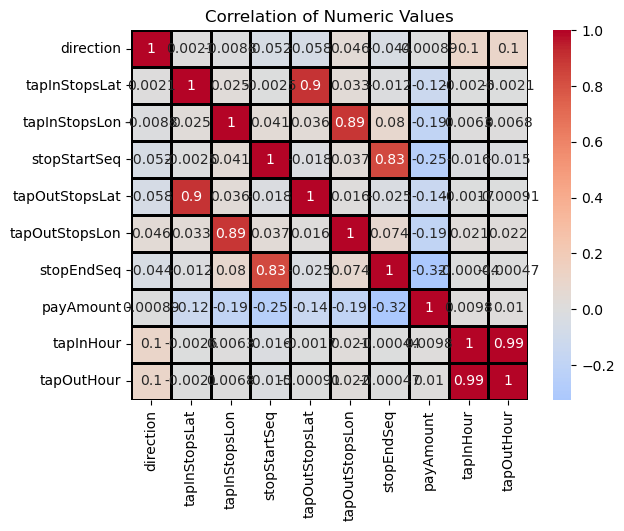

In [293]:
# Melihat korelasi dengan visualisasi heatmap
sns.heatmap(data=df.corr(numeric_only=True),
            annot=True,
            cmap= 'coolwarm',
            center = 0,
            linecolor = 'black',
            linewidths = 1)

plt.title('Correlation of Numeric Values')

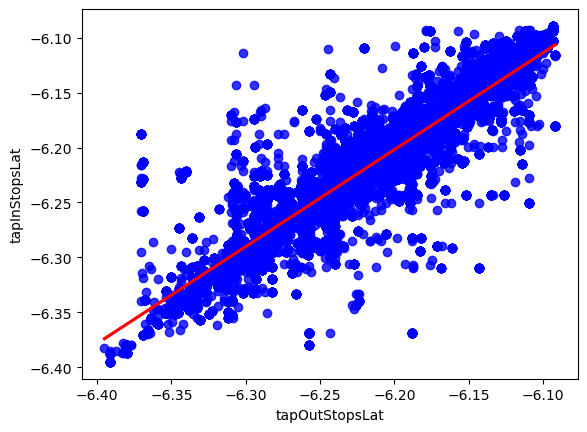

In [295]:
sns.regplot(data=df, x='tapOutStopsLat', y='tapInStopsLat', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

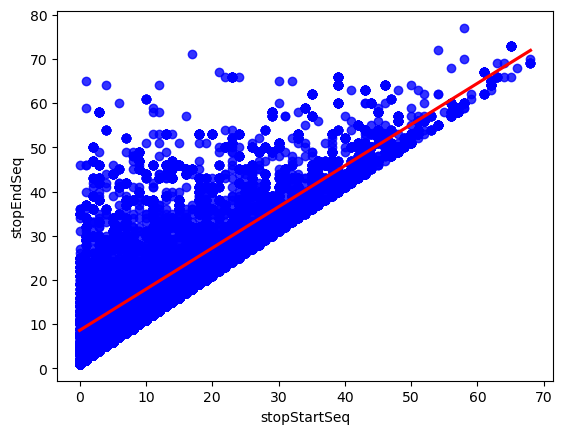

In [281]:
sns.regplot(data=df, x='stopStartSeq', y='stopEndSeq', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()


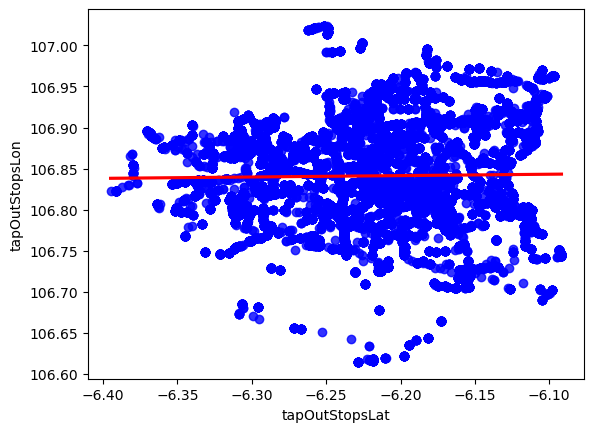

In [282]:
sns.regplot(data=df, x='tapOutStopsLat', y='tapOutStopsLon', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()


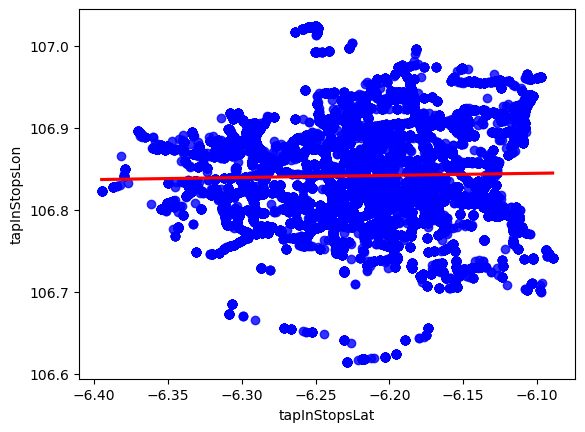

In [283]:
sns.regplot(data=df, x='tapInStopsLat', y='tapInStopsLon', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()


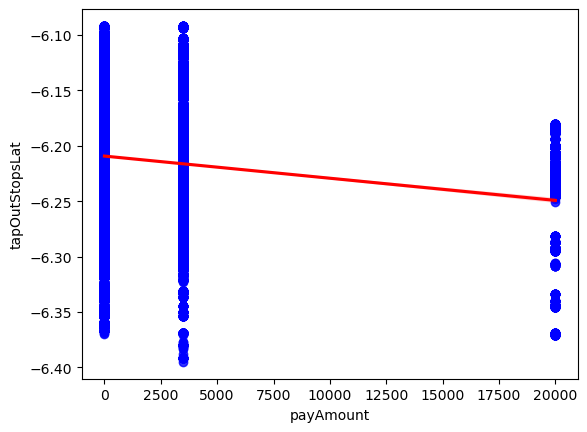

In [284]:
sns.regplot(data=df, x='payAmount', y='tapOutStopsLat', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

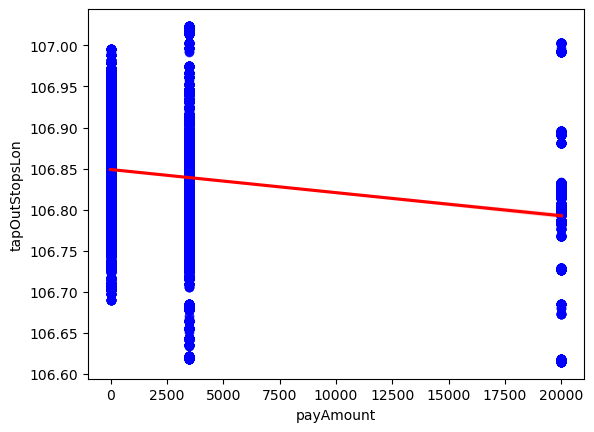

In [285]:
sns.regplot(data=df, x='payAmount', y='tapOutStopsLon', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

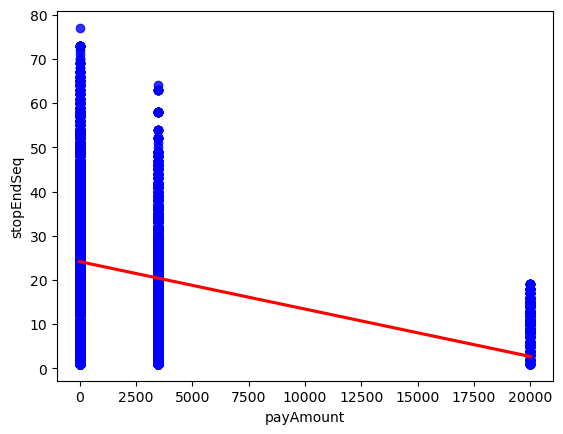

In [286]:
sns.regplot(data=df, x='payAmount', y='stopEndSeq', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

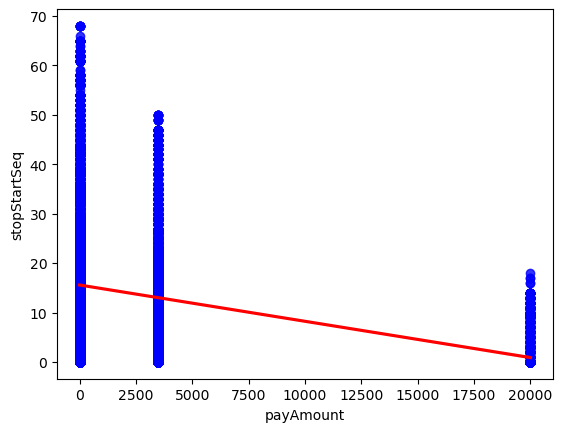

In [287]:
sns.regplot(data=df, x='payAmount', y='stopStartSeq', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

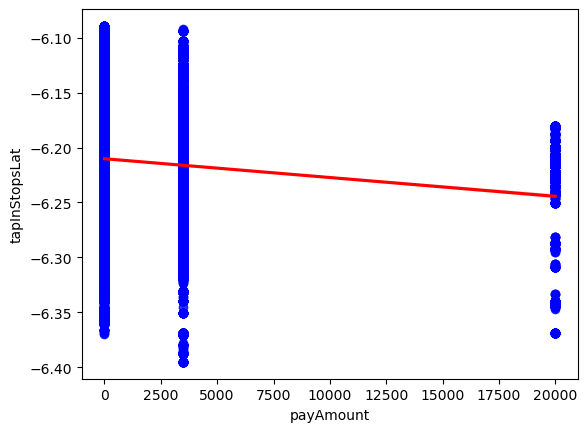

In [288]:
sns.regplot(data=df, x='payAmount', y='tapInStopsLat', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

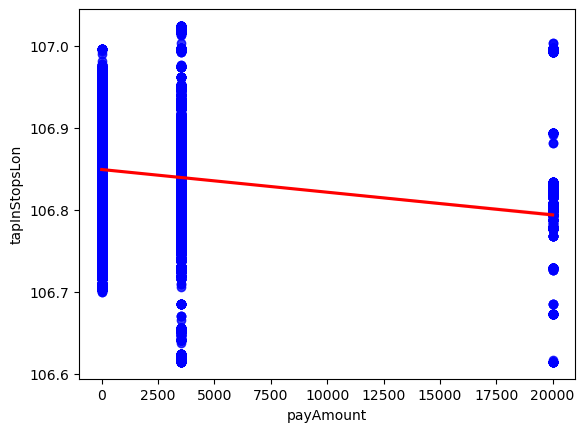

In [289]:
sns.regplot(data=df, x='payAmount', y='tapInStopsLon', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

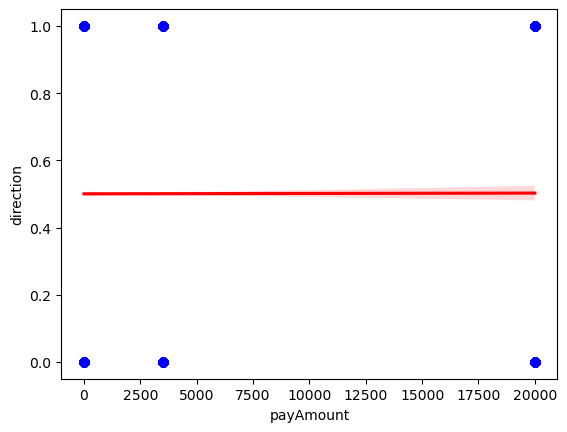

In [290]:
sns.regplot(data=df, x='payAmount', y='direction', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.show()

**Insight visualisasi Scatterplot data numerik**
- Secara visualisasi tidak ada korelasi yang valid antar 2 kolom numerik dari dataframe yang digunakan
- Hal tersebut dapat terlihat dari bentuk plotnya yang cenderung persebaran datanya membentuk arah horizontal
- Terdapat juga beberapa plot yang persebaran datanya membentuk arah lurus secara vertikal. Hal tersebut menunjukkan bahwa persebaran data hanya bergerak pada beberapa nilai pada sumbu X nya saja dan tidak ada nilai yang tersebar secara variatif dari sumbu X
- Hanya ada korelasi antara tapInStopsLat dengan tapOutStopsLat yang memiliki pola korelasi terbaik dikarenakan nilai korelasi tersebut bernilai 0.9